In [1]:

# ░█████╗░███╗░░██╗░█████╗░██╗░░░░░██╗░░░██╗░██████╗██╗░██████╗
# ██╔══██╗████╗░██║██╔══██╗██║░░░░░╚██╗░██╔╝██╔════╝██║██╔════╝
# ███████║██╔██╗██║███████║██║░░░░░░╚████╔╝░╚█████╗░██║╚█████╗░
# ██╔══██║██║╚████║██╔══██║██║░░░░░░░╚██╔╝░░░╚═══██╗██║░╚═══██╗
# ██║░░██║██║░╚███║██║░░██║███████╗░░░██║░░░██████╔╝██║██████╔╝
# ╚═╝░░╚═╝╚═╝░░╚══╝╚═╝░░╚═╝╚══════╝░░░╚═╝░░░╚═════╝░╚═╝╚═════╝░

# Preámbulo
En este documento se utiliza la base de datos producida en los scripts de procesamiento (disponibles en `/Scripts/1-ProcessingScripts/Delitos Georreferenciados` ) para crear los gráficos solicitados por Daniel en el que se observe la tasa del crimen por cada localidad, organizando las localidades en orden ascendente de acuerdo al estrato promedio.

In [89]:
import pandas as pd 
import shapely.geometry as geom
import geopandas as gpd
from simpledbf import Dbf5
import os
from unidecode import unidecode
import re
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

# Set locals for directories
working_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI"
data_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Datos"

# Test directories

os.listdir(working_dir)

['Datos',
 '.DS_Store',
 'Output',
 'UPZs que faltan.pdf',
 'Scripts',
 '.backups',
 'multiproposito.pdf']

In [3]:
# Load database
df=gpd.read_file(f"{data_dir}/3-AnalysisData/delitos_por_localidad.gpkg")

In [167]:
# Create a function that eases the process of plotting each crime per year

def plot(dataframe, t_delito:str, s_delito:str, year:str):
    """
    Function to create the required plots.
    """
    
    df = dataframe.copy()
    df=df.sort_values(by='ESTRATO_mean')

    filtro=[i for i in df.columns if f"tasa_{s_delito}" in i]
    M=df.loc[:,filtro].max().max() # Set max for axis limits
    
    fig, ax1 = plt.subplots(figsize=(8, 3))
    ax2 = ax1.twinx()

    ax1.set_title(f"{t_delito} por localidad \n {year}")

    ax1.bar(x=df['LocNombre'],height=df[f'tasa_{s_delito}_{year}'], color='grey')
    ax1.set_xticklabels(df['LocNombre'], rotation=90)
    ax1.set_ylabel('Tasa x 100 mil hab.')
    ax2.set_ylim([0,M])
    
    # Plot social stratum
    ax2.set_ylim([0,6])
    ax2.scatter(x=df['LocNombre'], y=df['ESTRATO_mean'], color='black')
    ax2.errorbar(x=df['LocNombre'],y=df['ESTRATO_mean'], yerr=df['ESTRATO_stddev'],linestyle='', 
             ecolor='#404040', elinewidth=.5)
    ax2.set_ylabel('Estrato promedio')
    [ax2.text(i, j+.3, f'({np.float64(j).round(1)})', fontsize=9, ha='center') for (i, j) in zip(df['LocNombre'], df['ESTRATO_mean'])]
    # ax1.text(-1,-250, "Estrato promedio en paréntesis.", fontsize=8)
    return fig

# 1-Delitos sexuales

In [157]:
### Load necessary strings

n_delito = "1"
s_delito = "delitos_sexuales"
t_delito = "Delitos sexuales"

In [30]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)

In [138]:
df.columns

Index(['LocNombre', 'LocAAdmini', 'LocArea', 'LocCodigo', 'SHAPE_Leng',
       'SHAPE_Area', 'ESTRATO_mean', 'ESTRATO_median', 'ESTRATO_stddev',
       'poblacion_loc_2018', 'poblacion_loc_2019', 'poblacion_loc_2020',
       'poblacion_loc_2021', 'poblacion_loc_2022', 'delitos_sexuales_2018',
       'homicidios_2018', 'homicidios_2019', 'homicidios_2020',
       'homicidios_2021', 'violencia_intrafamiliar_2018',
       'hurto_a_personas_2018', 'hurto_a_personas_2019',
       'hurto_a_personas_2020', 'hurto_a_personas_2021',
       'hurto_a_residencias_2018', 'hurto_automotores_2018',
       'hurto_automotores_2019', 'hurto_automotores_2020',
       'hurto_automotores_2021', 'hurto_motocicletas_2018',
       'hurto_motocicletas_2019', 'hurto_motocicletas_2020',
       'hurto_motocicletas_2021', 'hurto_comercios_2018',
       'hurto_comercios_2019', 'hurto_comercios_2020', 'hurto_comercios_2021',
       'geometry', 'tasa_delitos_sexuales_2018', 'tasa_homicidios_2018',
       'tasa_homici

In [158]:
filtro=[i for i in df.columns if f"tasa_{s_delito}" in i]
M=df.loc[:,filtro].max().max()

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/2485676405.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


[Text(CIUDAD BOLIVAR, 1.437058, '(1.1)'),
 Text(USME, 1.521687, '(1.2)'),
 Text(CANDELARIA, 1.875758, '(1.6)'),
 Text(SAN CRISTOBAL, 2.070648, '(1.8)'),
 Text(BOSA, 2.07657, '(1.8)'),
 Text(SANTA FE, 2.253668, '(2.0)'),
 Text(RAFAEL URIBE URIBE, 2.3112139999999997, '(2.0)'),
 Text(TUNJUELITO, 2.3851809999999998, '(2.1)'),
 Text(KENNEDY, 2.467882, '(2.2)'),
 Text(PUENTE ARANDA, 2.670959, '(2.4)'),
 Text(ENGATIVA, 2.6785859999999997, '(2.4)'),
 Text(FONTIBON, 2.705815, '(2.4)'),
 Text(LOS MARTIRES, 2.840166, '(2.5)'),
 Text(ANTONIO NARIÑO, 2.89736, '(2.6)'),
 Text(SUBA, 2.9472799999999997, '(2.6)'),
 Text(BARRIOS UNIDOS, 3.23278, '(2.9)'),
 Text(USAQUEN, 3.5698149999999997, '(3.3)'),
 Text(TEUSAQUILLO, 3.673637, '(3.4)'),
 Text(CHAPINERO, 3.8564239999999996, '(3.6)')]

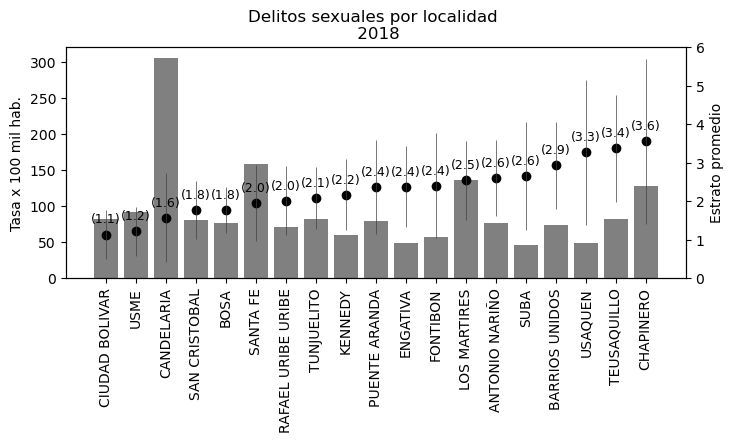

In [159]:
df=df.sort_values(by='ESTRATO_mean')

fig, ax1 = plt.subplots(figsize=(8, 3))
ax2 = ax1.twinx()

ax1.set_title(f"{t_delito} por localidad \n {year}")

ax1.bar(x=df['LocNombre'],height=df[f'tasa_{s_delito}_{year}'], color='grey')
ax1.set_xticklabels(df['LocNombre'], rotation=90)
ax1.set_ylabel('Tasa x 100 mil hab.')
ax2.set_ylim([0,M])

# Plot social stratum
ax2.set_ylim([0,6])

ax2.scatter(x=df['LocNombre'], y=df['ESTRATO_mean'], color='black')
ax2.errorbar(x=df['LocNombre'],y=df['ESTRATO_mean'], yerr=df['ESTRATO_stddev'],linestyle='', 
             ecolor='#404040', elinewidth=.5)
ax2.set_ylabel('Estrato promedio')
[ax2.text(i, j+.3, f'({np.float64(j).round(1)})', fontsize=9, ha='center') for (i, j) in zip(df['LocNombre'], df['ESTRATO_mean'])]
# ax1.text(-1,-25, "Estrato promedio en paréntesis.", fontsize=8)

# 3-Homicidios

In [161]:
### Load necessary strings

n_delito = "3"
s_delito = "homicidios"
t_delito = "Homicidios"

In [11]:
# year=2018
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
# year=2019
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
# year=2020
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
# year=2021
# df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


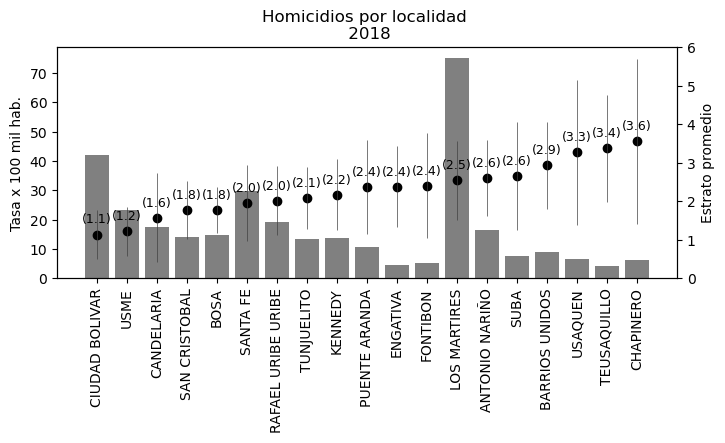

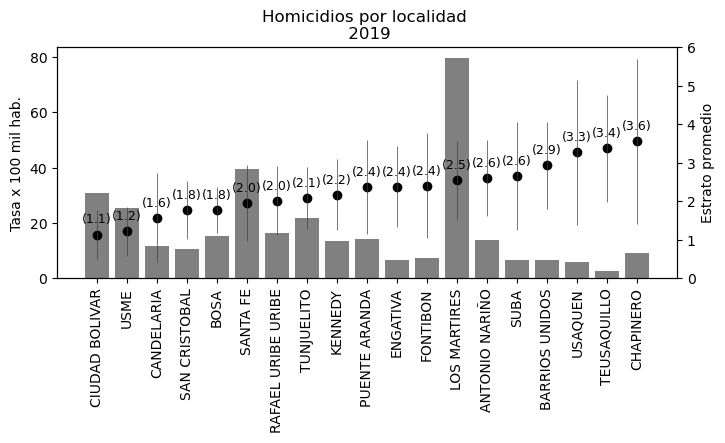

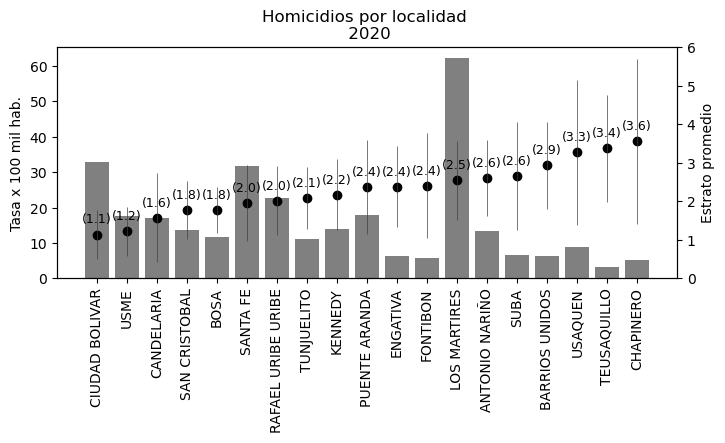

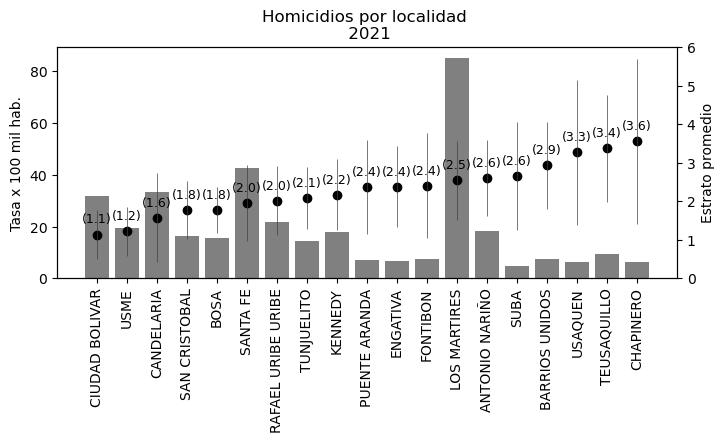

In [168]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 4-Violencia intrafamiliar

In [170]:
### Load necessary strings

n_delito = "4"
s_delito = "violencia_intrafamiliar"
t_delito = "Violencia intrafamiliar"

In [14]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)

Index(['LocNombre', 'LocAAdmini', 'LocArea', 'LocCodigo', 'SHAPE_Leng',
       'SHAPE_Area', 'ESTRATO_mean', 'ESTRATO_median', 'ESTRATO_stddev',
       'poblacion_loc_2018', 'poblacion_loc_2019', 'poblacion_loc_2020',
       'poblacion_loc_2021', 'poblacion_loc_2022', 'delitos_sexuales_2018',
       'homicidios_2018', 'homicidios_2019', 'homicidios_2020',
       'homicidios_2021', 'violencia_intrafamiliar_2018',
       'hurto_a_personas_2018', 'hurto_a_personas_2019',
       'hurto_a_personas_2020', 'hurto_a_personas_2021',
       'hurto_a_residencias_2018', 'hurto_automotores_2018',
       'hurto_automotores_2019', 'hurto_automotores_2020',
       'hurto_automotores_2021', 'hurto_motocicletas_2018',
       'hurto_motocicletas_2019', 'hurto_motocicletas_2020',
       'hurto_motocicletas_2021', 'hurto_comercios_2018',
       'hurto_comercios_2019', 'hurto_comercios_2020', 'hurto_comercios_2021',
       'geometry', 'tasa_delitos_sexuales_2018', 'tasa_homicidios_2018',
       'tasa_homici

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


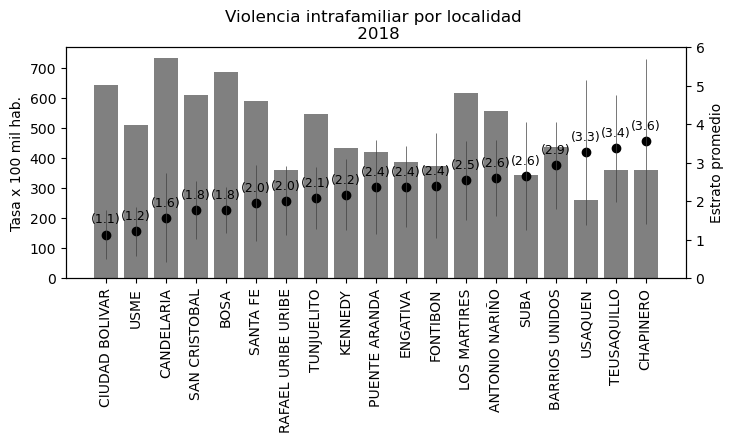

In [171]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');

# 6-Hurto a personas

In [172]:
### Load necessary strings

n_delito = "6"
s_delito = "hurto_a_personas"
t_delito = "Hurto a personas"

In [16]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


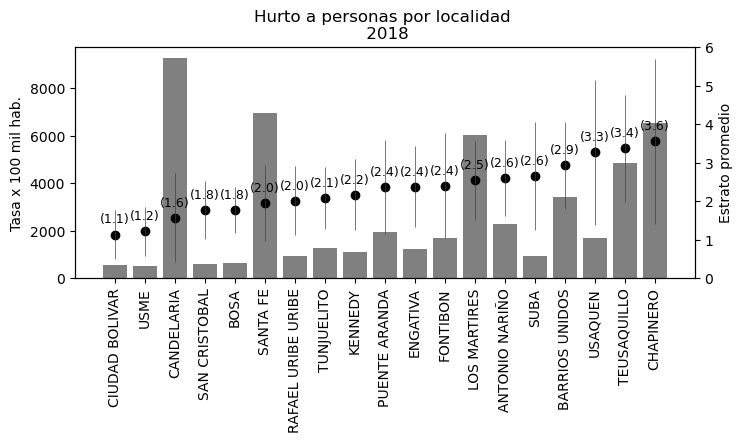

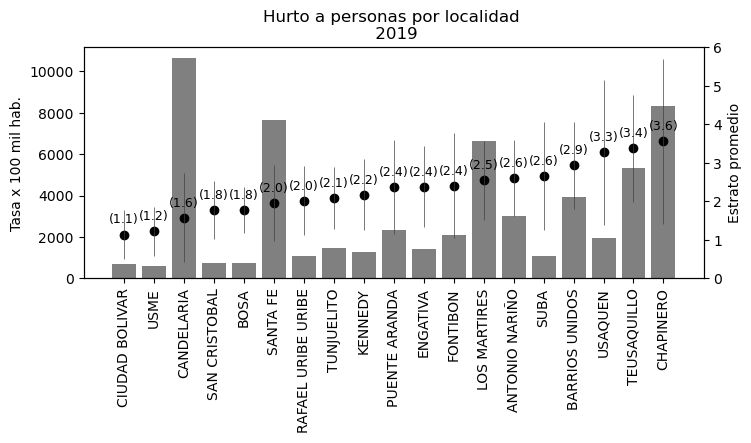

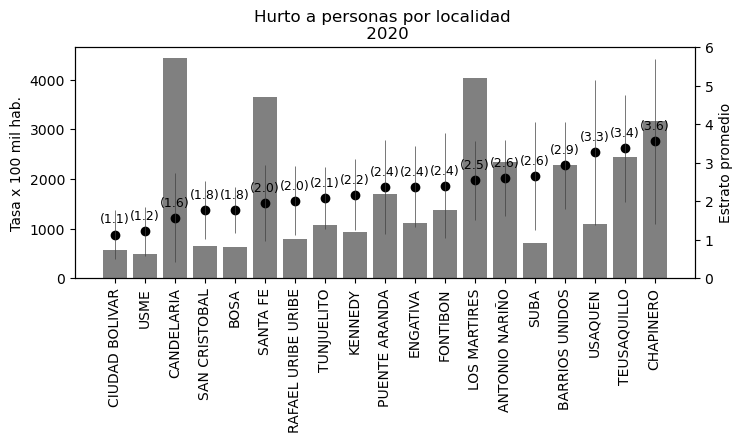

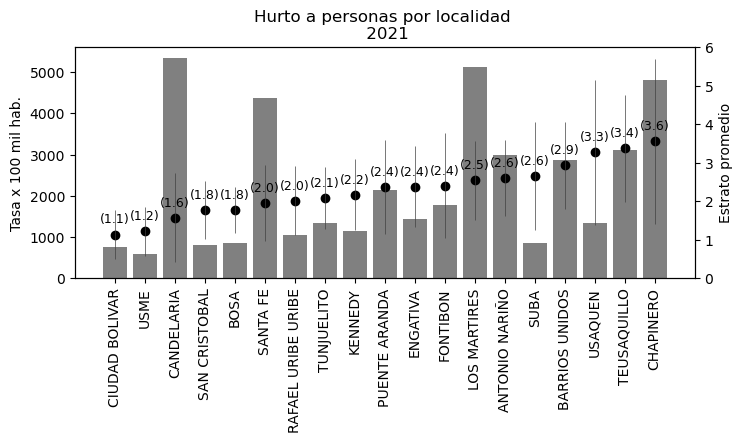

In [173]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 7-Hurto a residencias

In [174]:
### Load necessary strings

n_delito = "7"
s_delito = "hurto_a_residencias"
t_delito = "Hurto a residencias"

In [18]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


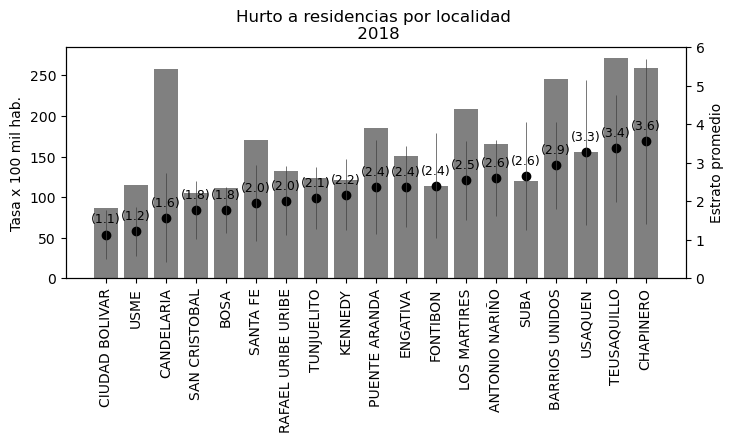

In [175]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');

# 8-Hurto de automotores

In [176]:
### Load necessary strings

n_delito = "8"
s_delito = "hurto_automotores"
t_delito = "Hurto de automotores"

In [20]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


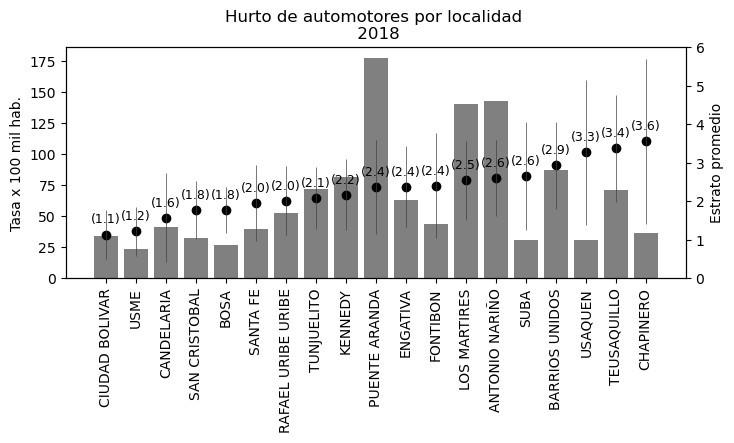

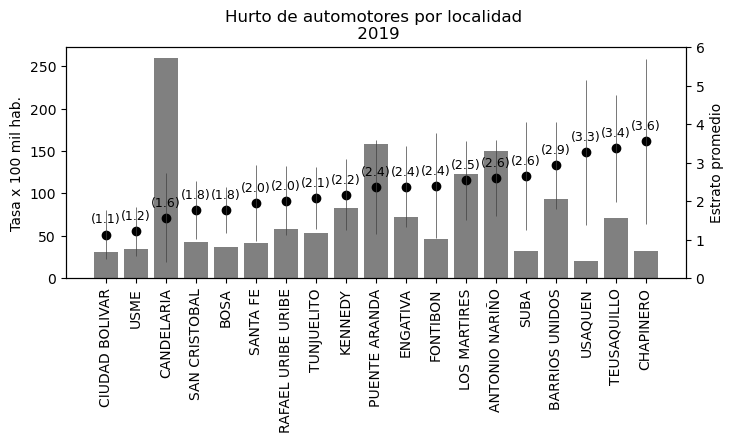

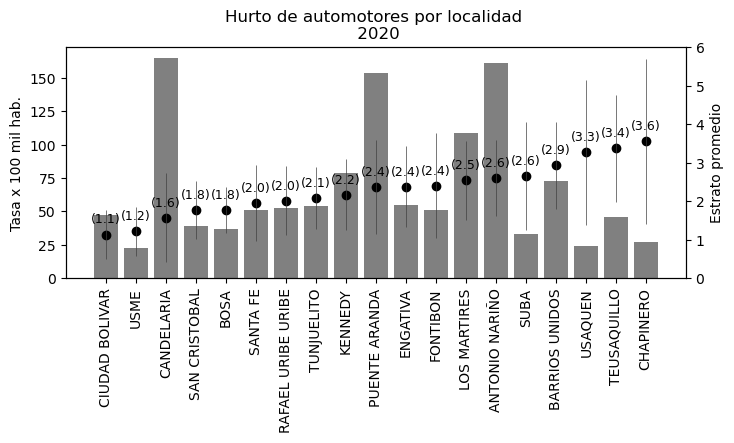

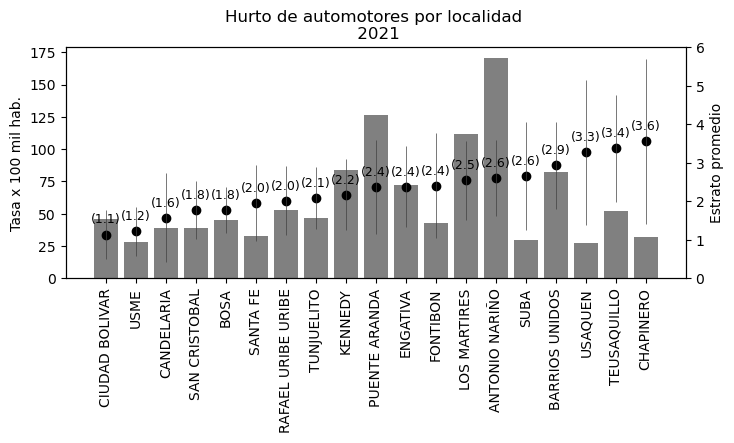

In [177]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 9-Hurto de motocicletas

In [178]:
### Load necessary strings

n_delito = "9"
s_delito = "hurto_motocicletas"
t_delito = "Hurto de motocicletas"

In [22]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


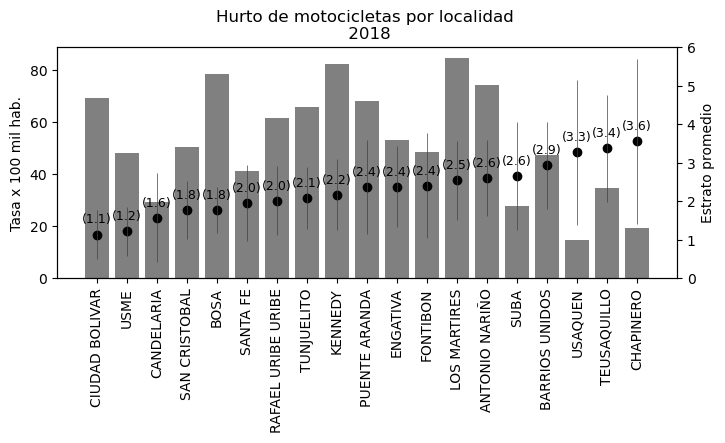

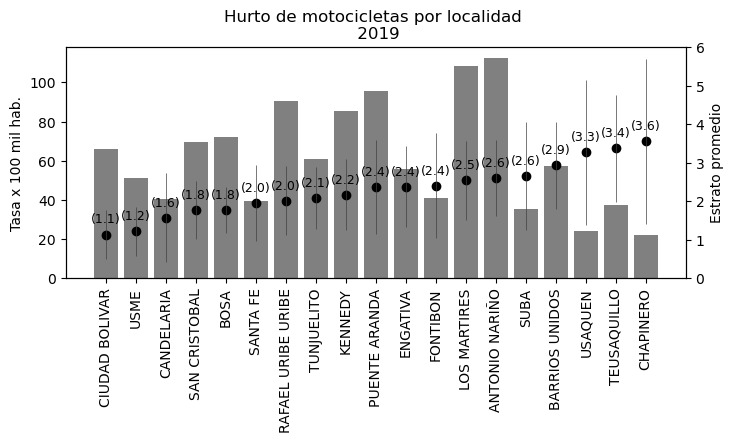

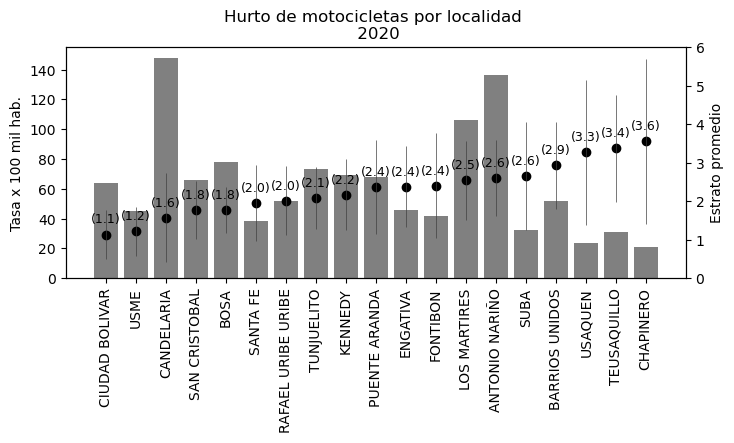

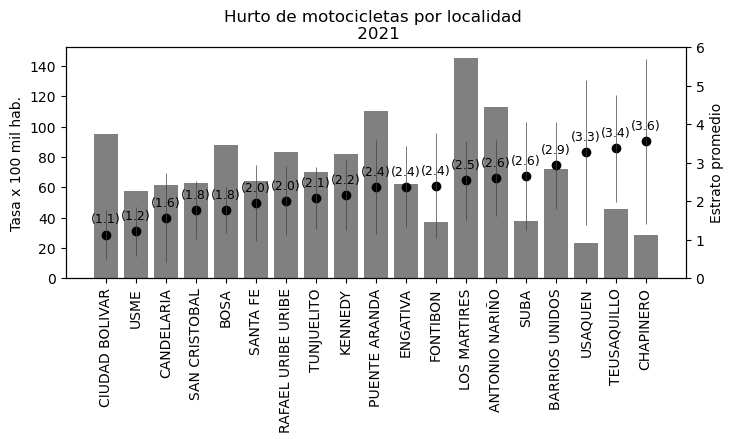

In [179]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');

# 10-Hurto a comercios

In [180]:
### Load necessary strings

n_delito = "10"
s_delito = "hurto_comercios"
t_delito = "Hurto a comercios"

In [24]:
year=2018
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2019
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2020
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)
year=2021
df[f'tasa_{s_delito}_{year}']=np.round(df[f'{s_delito}_{year}']/df[f'poblacion_loc_{year}']*100000,2)


/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)
/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_14056/978821508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['LocNombre'], rotation=90)


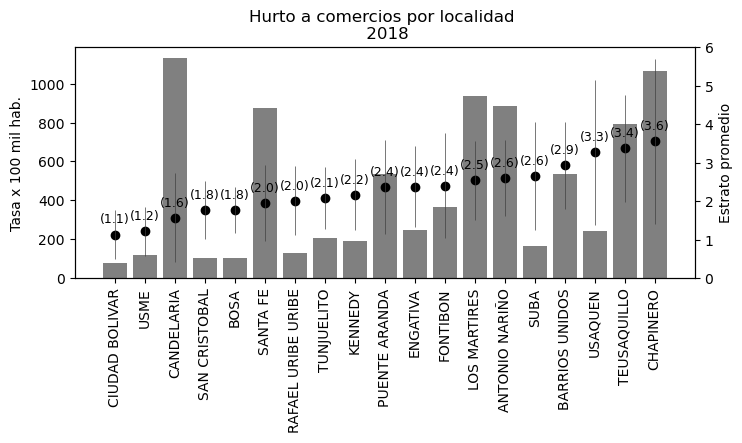

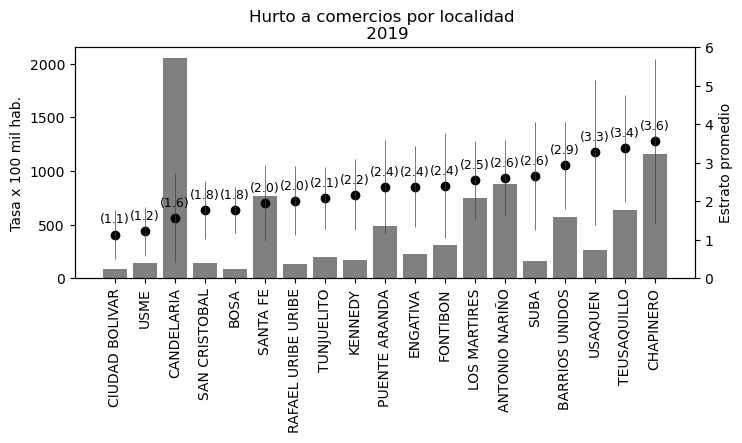

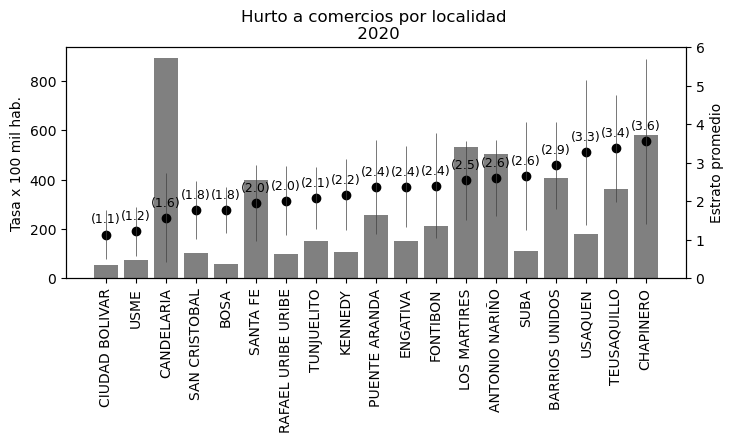

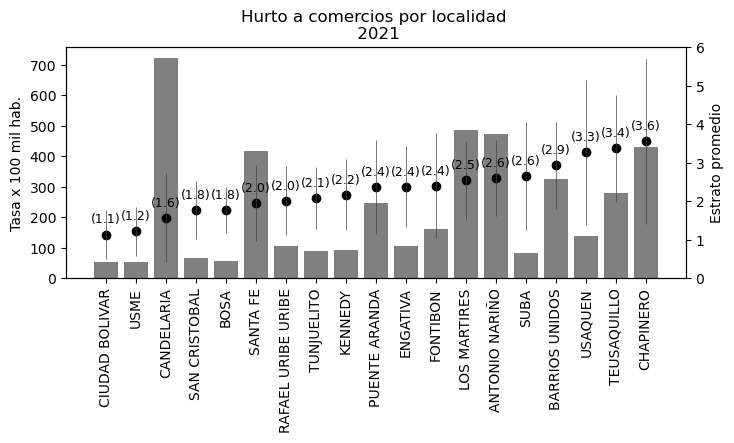

In [181]:
plot(df, t_delito=t_delito, s_delito=s_delito, year='2018');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2019');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2020');
plot(df, t_delito=t_delito, s_delito=s_delito, year='2021');